# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Discriminant Analysis

# Linear Discriminant Analysis (LDA)

In [6]:
time1_lda_0 = datetime.datetime.now()

lda_0 = LDA(n_components=None,solver="svd")
model_lda_0 = lda_0.fit(X_train, y_train)
y_lda_0 = model_lda_0.predict(X_test)
y_probs_lda_0 = model_lda_0.predict_proba(X_test)[:, 1]
time2_lda_0 = datetime.datetime.now()
print_score(y_test,y_lda_0,time1_lda_0,time2_lda_0)

comfusion matrix = 
[[2480  433]
 [ 107 4073]]

accuracy_score =  0.9238686028478782

completeness =  0.974401913875598
contamination =  0.09609409675987572

precision score =  0.9039059032401243
recall score =  0.974401913875598

F1 score =  0.9378309924015658

time span=  0:00:01.130883


E:\program\python\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [7]:
time1_lda_1 = datetime.datetime.now()

lda_1 = LDA(n_components=None,solver="lsqr")
model_lda_1 = lda_1.fit(X_train, y_train)
y_lda_1 = model_lda_1.predict(X_test)
y_probs_lda_1 = model_lda_1.predict_proba(X_test)[:, 1]
time2_lda_1 = datetime.datetime.now()
print_score(y_test,y_lda_1,time1_lda_1,time2_lda_1)

comfusion matrix = 
[[   0 2913]
 [   0 4180]]

accuracy_score =  0.5893134075849429

completeness =  1.0
contamination =  0.4106865924150571

precision score =  0.5893134075849429
recall score =  1.0

F1 score =  0.7415949614122239

time span=  0:00:00.169634


In [8]:
time1_lda_2 = datetime.datetime.now()

lda_2 = LDA(n_components=None,solver="svd")
model_lda_2 = lda_2.fit(X_std_train, y_train)
y_lda_2 = model_lda_2.predict(X_std_test)
y_probs_lda_2 = model_lda_2.predict_proba(X_std_test)[:, 1]
time2_lda_2 = datetime.datetime.now()
print_score(y_test,y_lda_2,time1_lda_2,time2_lda_2)

comfusion matrix = 
[[2473  440]
 [ 282 3898]]

accuracy_score =  0.8982095023262371

completeness =  0.9325358851674641
contamination =  0.10142923005993545

precision score =  0.8985707699400646
recall score =  0.9325358851674641

F1 score =  0.915238318854191

time span=  0:00:00.153103


E:\program\python\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [9]:
time1_lda_3 = datetime.datetime.now()

lda_3 = LDA(n_components=None,solver="lsqr")
model_lda_3 = lda_3.fit(X_std_train, y_train)
y_lda_3 = model_lda_3.predict(X_std_test)
y_probs_lda_3 = model_lda_3.predict_proba(X_std_test)[:, 1]
time2_lda_3 = datetime.datetime.now()
print_score(y_test,y_lda_3,time1_lda_3,time2_lda_3)

comfusion matrix = 
[[1837 1076]
 [3518  662]]

accuracy_score =  0.3523191879317637

completeness =  0.1583732057416268
contamination =  0.619102416570771

precision score =  0.380897583429229
recall score =  0.1583732057416268

F1 score =  0.22372423115917542

time span=  0:00:00.094747


In [10]:
time1_lda_4 = datetime.datetime.now()

lda_4 = LDA(n_components=None,solver="svd")
model_lda_4 = lda_4.fit(X_mm_train, y_train)
y_lda_4 = model_lda_4.predict(X_mm_test)
y_probs_lda_4 = model_lda_4.predict_proba(X_mm_test)[:, 1]
time2_lda_4 = datetime.datetime.now()
print_score(y_test,y_lda_4,time1_lda_4,time2_lda_4)

comfusion matrix = 
[[2911    2]
 [3989  191]]

accuracy_score =  0.4373325814182997

completeness =  0.04569377990430622
contamination =  0.010362694300518135

precision score =  0.9896373056994818
recall score =  0.04569377990430622

F1 score =  0.08735421907157558

time span=  0:00:00.135637


E:\program\python\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [11]:
time1_lda_5 = datetime.datetime.now()

lda_5 = LDA(n_components=None,solver="lsqr")
model_lda_5 = lda_5.fit(X_mm_train, y_train)
y_lda_5 = model_lda_5.predict(X_mm_test)
y_probs_lda_5 = model_lda_5.predict_proba(X_mm_test)[:, 1]
time2_lda_5 = datetime.datetime.now()
print_score(y_test,y_lda_5,time1_lda_5,time2_lda_5)

comfusion matrix = 
[[ 640 2273]
 [ 387 3793]]

accuracy_score =  0.6249823769914

completeness =  0.9074162679425838
contamination =  0.3747115067589845

precision score =  0.6252884932410155
recall score =  0.9074162679425838

F1 score =  0.740386492289674

time span=  0:00:00.089773


# Quadrat Discriminant Analysis (QDA)

In [12]:
time1_qda_0 = datetime.datetime.now()

qda_0 = QDA()
model_qda_0 = qda_0.fit(X_train, y_train)
y_qda_0 = model_qda_0.predict(X_test)
y_probs_qda_0 = model_qda_0.predict_proba(X_test)[:, 1]
time2_qda_0 = datetime.datetime.now()
print_score(y_test,y_qda_0,time1_qda_0,time2_qda_0)

comfusion matrix = 
[[2912    1]
 [4180    0]]

accuracy_score =  0.41054560834625686

completeness =  0.0
contamination =  1.0

precision score =  0.0
recall score =  0.0

F1 score =  0.0

time span=  0:00:00.218600


In [13]:
time1_qda_1 = datetime.datetime.now()

qda_1 = QDA()
model_qda_1 = qda_1.fit(X_std_train, y_train)
y_qda_1 = model_qda_1.predict(X_std_test)
y_probs_qda_1 = model_qda_1.predict_proba(X_std_test)[:, 1]
time2_qda_1 = datetime.datetime.now()
print_score(y_test,y_qda_1,time1_qda_1,time2_qda_1)

comfusion matrix = 
[[1051 1862]
 [1004 3176]]

accuracy_score =  0.5959396588185535

completeness =  0.7598086124401914
contamination =  0.36959110758237396

precision score =  0.630408892417626
recall score =  0.7598086124401914

F1 score =  0.6890865697548275

time span=  0:00:00.091743


E:\program\python\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
time1_qda_2 = datetime.datetime.now()

qda_2 = QDA()
model_qda_2 = qda_2.fit(X_mm_train, y_train)
y_qda_2 = model_qda_2.predict(X_mm_test)
y_probs_qda_2 = model_qda_2.predict_proba(X_mm_test)[:, 1]
time2_qda_2 = datetime.datetime.now()
print_score(y_test,y_qda_2,time1_qda_2,time2_qda_2)

comfusion matrix = 
[[2786  127]
 [4163   17]]

accuracy_score =  0.3951783448470323

completeness =  0.004066985645933014
contamination =  0.8819444444444444

precision score =  0.11805555555555555
recall score =  0.004066985645933014

F1 score =  0.00786308973172988

time span=  0:00:00.088967


E:\program\python\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


## Confusion Matrix

<IPython.core.display.Javascript object>


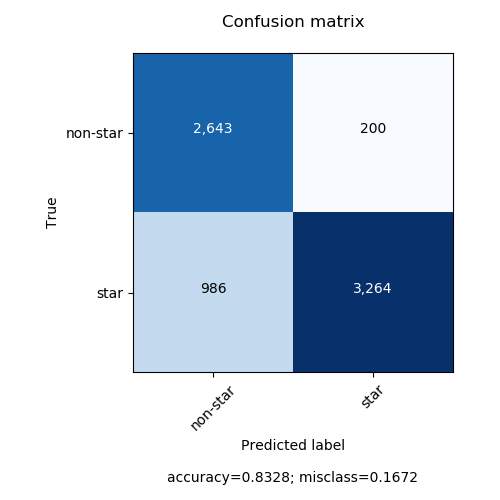

In [16]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_nb_3)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [15]:
score_lda_0 = score(y_test,y_lda_0,time1_lda_0,time2_lda_0)
score_lda_1 = score(y_test,y_lda_1,time1_lda_1 ,time2_lda_1)
score_lda_2 = score(y_test,y_lda_2,time1_lda_2 ,time2_lda_2)
score_lda_3 = score(y_test,y_lda_3,time1_lda_3 ,time2_lda_3)
score_lda_4 = score(y_test,y_lda_4,time1_lda_4 ,time2_lda_4)
score_lda_5 = score(y_test,y_lda_5,time1_lda_5 ,time2_lda_5)
score_qda_0 = score(y_test,y_qda_0,time1_qda_0,time2_qda_0)
score_qda_1 = score(y_test,y_qda_1,time1_qda_1 ,time2_qda_1)
score_qda_2 = score(y_test,y_qda_2,time1_qda_2 ,time2_qda_2)

In [16]:
m1_t = pd.DataFrame({
 'accuracy' : [score_lda_0[1],score_lda_1[1],score_lda_2 [1],score_lda_3[1],score_lda_4[1],score_lda_5[1],score_qda_0[1],score_qda_1[1],score_qda_2[1]],
 'completeness' : [score_lda_0[2],score_lda_1[2],score_lda_2 [2],score_lda_3[2],score_lda_4[2],score_lda_5[2],score_qda_0[2],score_qda_1[2],score_qda_2[2]],
 'contamination' : [score_lda_0[3],score_lda_1[3],score_lda_2 [3],score_lda_3[3],score_lda_4[3],score_lda_5[3],score_qda_0[3],score_qda_1[3],score_qda_2[3]],
 'precision' : [score_lda_0[4],score_lda_1[4],score_lda_2 [4],score_lda_3[4],score_lda_4[4],score_lda_5[4],score_qda_0[4],score_qda_1[4],score_qda_2[4]],
 'recall' : [score_lda_0[5],score_lda_1[5],score_lda_2 [5],score_lda_3[5],score_lda_4[5],score_lda_5[5],score_qda_0[5],score_qda_1[5],score_qda_2[5]],
 'F1 score' : [score_lda_0[6],score_lda_1[6],score_lda_2 [6],score_lda_3[6],score_lda_4[6],score_lda_5[6],score_qda_0[6],score_qda_1[6],score_qda_2[6]],
 'time span' : [score_lda_0[7],score_lda_1[7],score_lda_2 [7],score_lda_3[7],score_lda_4[7],score_lda_5[7],score_qda_0[7],score_qda_1[7],score_qda_2[7]]
                })

m1_t.rename(index = {0: "score_lda_0", 
                     1: "score_lda_1",
                     2: "score_lda_2",
                     3: "score_lda_3",
                     4: "score_lda_4",
                     5: "score_lda_5",
                     6: "score_qda_0",
                     7: "score_qda_1",
                     8: "score_qda_2",
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_lda_0,0.923869,0.974402,0.096094,0.903906,0.974402,0.937831,00:00:01.130883
score_lda_1,0.589313,1.000000,0.410687,0.589313,1.000000,0.741595,00:00:00.169634
score_lda_2,0.898210,0.932536,0.101429,0.898571,0.932536,0.915238,00:00:00.153103
score_lda_3,0.352319,0.158373,0.619102,0.380898,0.158373,0.223724,00:00:00.094747
score_lda_4,0.437333,0.045694,0.010363,0.989637,0.045694,0.087354,00:00:00.135637
score_lda_5,0.624982,0.907416,0.374712,0.625288,0.907416,0.740386,00:00:00.089773
score_qda_0,0.410546,0.000000,1.000000,0.000000,0.000000,0.000000,00:00:00.218600
score_qda_1,0.595940,0.759809,0.369591,0.630409,0.759809,0.689087,00:00:00.091743
score_qda_2,0.395178,0.004067,0.881944,0.118056,0.004067,0.007863,00:00:00.088967


<IPython.core.display.Javascript object>


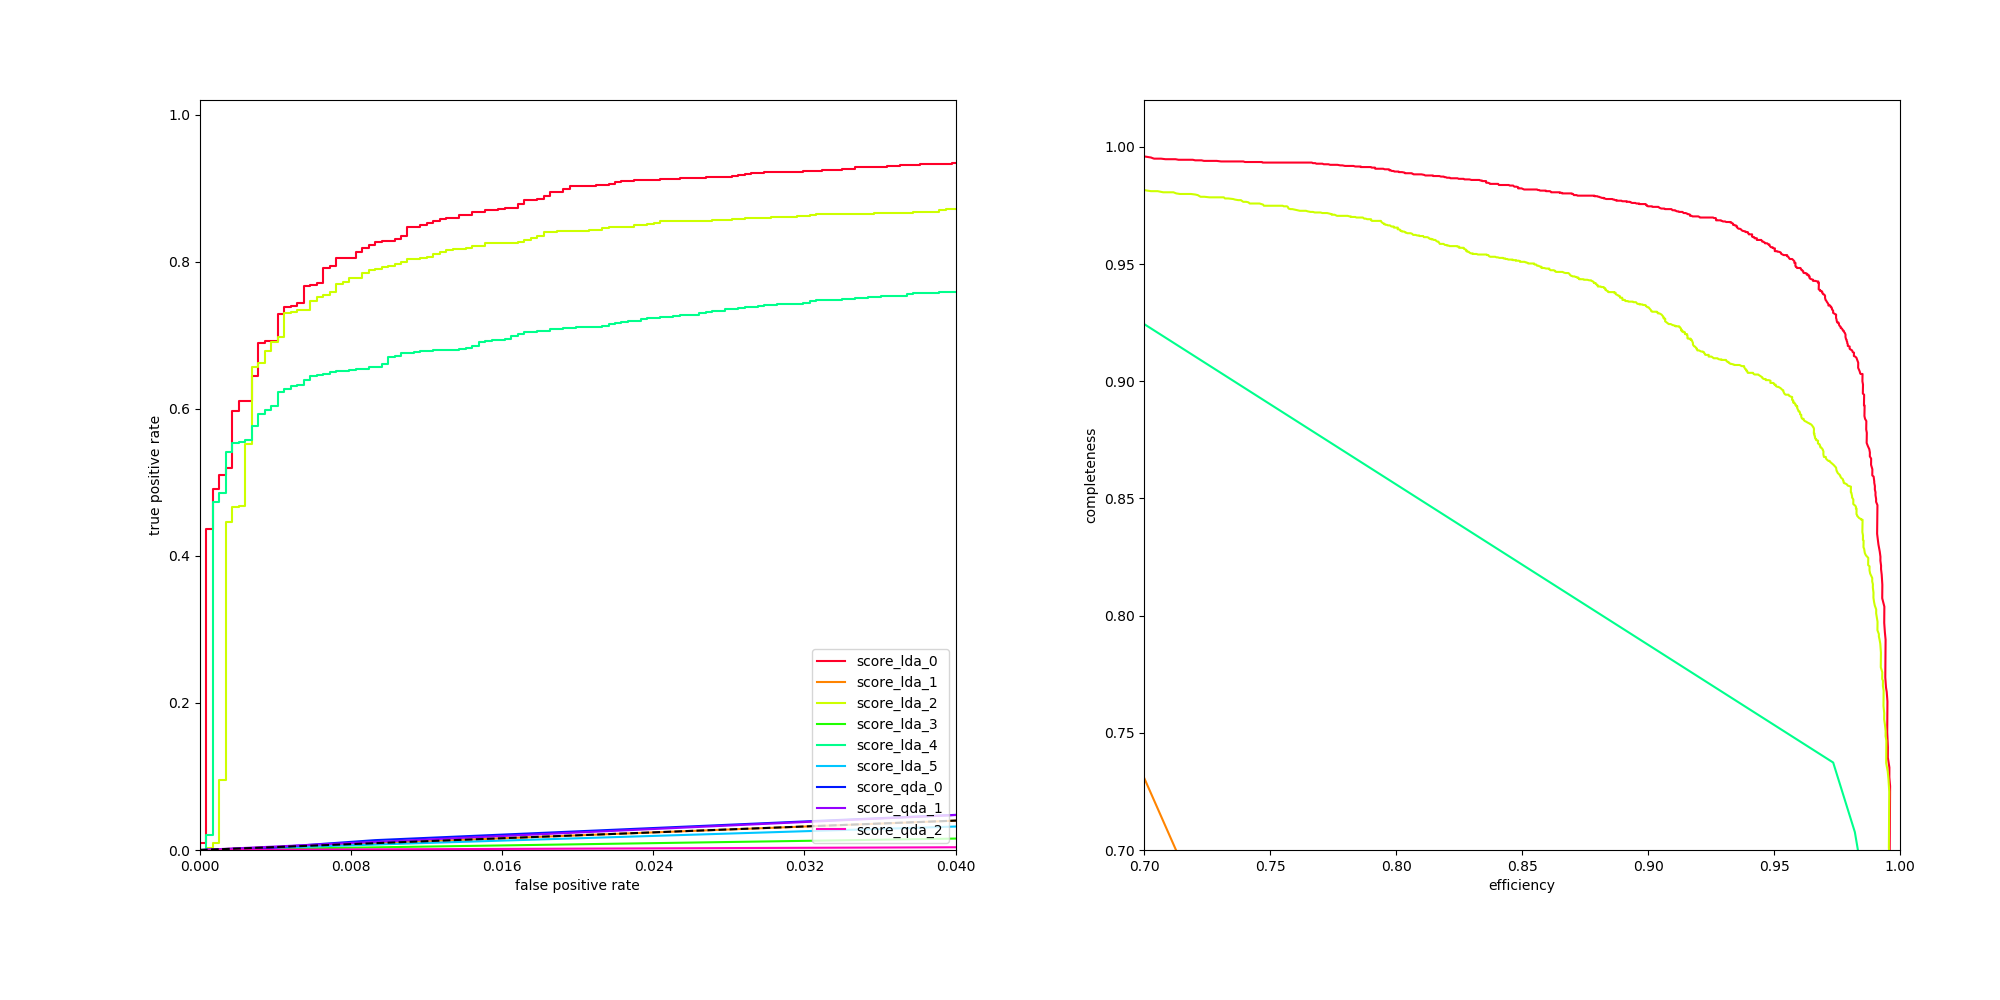

In [18]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_lda_0,y_probs_lda_1,y_probs_lda_2,y_probs_lda_3,y_probs_lda_4,y_probs_lda_5,y_probs_qda_0,y_probs_qda_1,y_probs_qda_2]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()